In [2]:
# Import the dependencies.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
#import citipy
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [7]:
# Import the requests library 
import requests

# import the API key 
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

# Loop through all the cities in our list.
#for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    #if (i % 50 == 0 and i >= 50):
        #set_count += 1
        #record_count = 1
    # Create endpoint URL with each city.
    #city_url = url + "&q=" + cities[i]

# Instead of using two for loops, we can use the enumerate() method as an alternative way to iterate through 
# the list of cities and retrieve both the index, and the city from the list. 

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b49d3572dcc44cc96a25bff710077c66
Processing Record 1 of Set 1 | karratha
Processing Record 2 of Set 1 | saint-pierre
Processing Record 3 of Set 1 | hastings
Processing Record 4 of Set 1 | bayeux
Processing Record 5 of Set 1 | suratgarh
Processing Record 6 of Set 1 | cap malheureux
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | mangai
Processing Record 12 of Set 1 | ribeira grande
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | carnarvon
Processing Record 15 of Set 1 | oranjemund
Processing Record 16 of Set 1 | katsuura
Processing Record 17 of Set 1 | strezhevoy
Processing Record 18 of Set 1 | formoso do araguaia
City not found. Skipping...
Processing Record 1

Processing Record 35 of Set 4 | do gonbadan
Processing Record 36 of Set 4 | dzhubga
Processing Record 37 of Set 4 | kihei
Processing Record 38 of Set 4 | cidreira
Processing Record 39 of Set 4 | dali
Processing Record 40 of Set 4 | basco
Processing Record 41 of Set 4 | salalah
Processing Record 42 of Set 4 | santiago
Processing Record 43 of Set 4 | salinopolis
Processing Record 44 of Set 4 | bathsheba
Processing Record 45 of Set 4 | coalcoman
City not found. Skipping...
Processing Record 46 of Set 4 | port augusta
Processing Record 47 of Set 4 | taoudenni
Processing Record 48 of Set 4 | jalu
Processing Record 49 of Set 4 | nanortalik
Processing Record 50 of Set 4 | victoria
Processing Record 1 of Set 5 | richards bay
Processing Record 2 of Set 5 | beruwala
Processing Record 3 of Set 5 | saskylakh
Processing Record 4 of Set 5 | bakel
Processing Record 5 of Set 5 | chowchilla
Processing Record 6 of Set 5 | dikson
Processing Record 7 of Set 5 | pevek
Processing Record 8 of Set 5 | geraldt

Processing Record 26 of Set 8 | sadovyy
Processing Record 27 of Set 8 | isangel
Processing Record 28 of Set 8 | yamada
Processing Record 29 of Set 8 | batagay
Processing Record 30 of Set 8 | east wenatchee bench
Processing Record 31 of Set 8 | gwanda
Processing Record 32 of Set 8 | leshukonskoye
Processing Record 33 of Set 8 | shaowu
Processing Record 34 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 35 of Set 8 | porto belo
Processing Record 36 of Set 8 | pangai
Processing Record 37 of Set 8 | ishigaki
Processing Record 38 of Set 8 | erenhot
Processing Record 39 of Set 8 | saint-georges
Processing Record 40 of Set 8 | azangaro
Processing Record 41 of Set 8 | chai badan
Processing Record 42 of Set 8 | umm lajj
Processing Record 43 of Set 8 | sao joao da barra
Processing Record 44 of Set 8 | madingou
Processing Record 45 of Set 8 | liberal
Processing Record 46 of Set 8 | alampur
Processing Record 47 of Set 8 | andenes
Processing Record 48 of Set 8 | waipawa
Process

Processing Record 13 of Set 12 | boyabat
Processing Record 14 of Set 12 | wuwei
Processing Record 15 of Set 12 | batticaloa
Processing Record 16 of Set 12 | husavik
Processing Record 17 of Set 12 | fort nelson
Processing Record 18 of Set 12 | baza
Processing Record 19 of Set 12 | ixtapa
Processing Record 20 of Set 12 | kurbnesh
Processing Record 21 of Set 12 | roald
Processing Record 22 of Set 12 | pochutla
Processing Record 23 of Set 12 | malanje
Processing Record 24 of Set 12 | oksfjord
Processing Record 25 of Set 12 | vostok
Processing Record 26 of Set 12 | tahe
Processing Record 27 of Set 12 | khuldabad
Processing Record 28 of Set 12 | lampa
Processing Record 29 of Set 12 | semnan
Processing Record 30 of Set 12 | sisimiut
Processing Record 31 of Set 12 | dinsor
City not found. Skipping...
Processing Record 32 of Set 12 | xai-xai
Processing Record 33 of Set 12 | amga
Processing Record 34 of Set 12 | nueva italia
Processing Record 35 of Set 12 | hunza
City not found. Skipping...
Proc

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Karratha,-20.7377,116.8463,81.30,44,33,6.49,AU,2021-04-03 21:39:59
1,Saint-Pierre,-21.3393,55.4781,77.00,78,0,6.91,RE,2021-04-03 21:39:59
2,Hastings,50.8552,0.5729,44.60,65,90,18.41,GB,2021-04-03 21:37:45
3,Bayeux,-7.1250,-34.9322,78.80,94,75,11.50,BR,2021-04-03 21:39:59
4,Suratgarh,29.3167,73.9000,72.45,8,19,9.78,IN,2021-04-03 21:40:00
5,Cap Malheureux,-19.9842,57.6142,79.00,83,10,3.00,MU,2021-04-03 21:40:00
6,Ushuaia,-54.8000,-68.3000,39.20,81,40,20.71,AR,2021-04-03 21:40:00
7,Iqaluit,63.7506,-68.5145,0.00,71,75,3.44,CA,2021-04-03 21:40:01
8,Puerto Ayora,-0.7393,-90.3518,82.40,74,20,9.22,EC,2021-04-03 21:40:01
9,Mangai,-4.0500,19.5333,69.89,96,100,0.51,CD,2021-04-03 21:40:01


In [11]:
new_column_order = ["City", "Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Karratha,AU,2021-04-03 21:39:59,-20.7377,116.8463,81.30,44,33,6.49
1,Saint-Pierre,RE,2021-04-03 21:39:59,-21.3393,55.4781,77.00,78,0,6.91
2,Hastings,GB,2021-04-03 21:37:45,50.8552,0.5729,44.60,65,90,18.41
3,Bayeux,BR,2021-04-03 21:39:59,-7.1250,-34.9322,78.80,94,75,11.50
4,Suratgarh,IN,2021-04-03 21:40:00,29.3167,73.9000,72.45,8,19,9.78
5,Cap Malheureux,MU,2021-04-03 21:40:00,-19.9842,57.6142,79.00,83,10,3.00
6,Ushuaia,AR,2021-04-03 21:40:00,-54.8000,-68.3000,39.20,81,40,20.71
7,Iqaluit,CA,2021-04-03 21:40:01,63.7506,-68.5145,0.00,71,75,3.44
8,Puerto Ayora,EC,2021-04-03 21:40:01,-0.7393,-90.3518,82.40,74,20,9.22
9,Mangai,CD,2021-04-03 21:40:01,-4.0500,19.5333,69.89,96,100,0.51


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

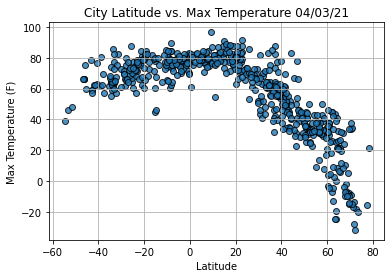

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

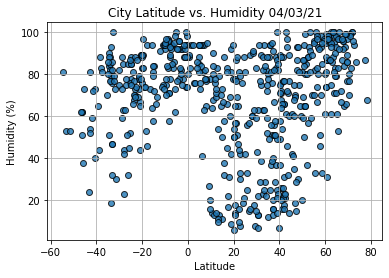

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

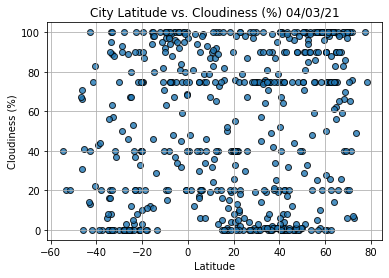

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

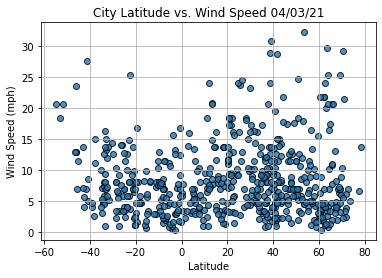

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()